# Machine Learning Simple Example

In [1]:
import pandas as pd
#data are public and available at: --> https://catalog.data.gov/dataset/observed-monthly-rain-gauge-accumulations
df = pd.read_csv('Observed_Monthly_Rain_Gauge_Accumulations_-_Oct_2002_to_May_2017.csv')
df

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25
0,11/30/2002,2.43,3.36,2.88,2.48,0.78,2.49,2.57,2.93,3.25,2.38,2.59,2.46,3.06,2.69,3.59,3.17,3.15
1,12/31/2002,4.31,1.40,5.46,4.80,1.99,5.06,2.48,2.35,6.48,4.95,5.71,3.57,5.77,3.28,5.77,6.02,5.60
2,01/31/2003,6.55,7.35,5.84,6.48,7.57,4.47,7.39,7.31,5.42,6.58,7.58,5.72,7.47,8.32,9.69,7.66,7.17
3,02/28/2003,1.61,1.81,1.70,1.49,1.11,1.50,1.56,1.73,1.18,1.37,1.47,1.33,1.19,1.21,1.52,1.09,1.34
4,03/31/2003,5.01,5.88,3.12,5.01,5.09,5.15,5.14,5.01,5.68,4.01,5.16,4.57,5.50,5.61,5.62,5.49,4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,01/31/2017,4.24,4.08,4.03,3.95,4.03,4.51,4.00,4.19,3.95,4.01,4.20,4.28,4.06,3.95,3.98,4.02,4.02
171,02/28/2017,8.36,8.52,8.18,8.11,8.49,8.08,7.90,8.45,9.63,8.91,8.64,9.10,8.71,8.84,8.20,8.76,9.43
172,03/31/2017,7.19,6.77,6.59,6.71,6.31,7.00,6.54,7.20,7.33,6.53,7.15,7.02,6.64,6.92,5.70,7.38,6.68
173,04/30/2017,4.84,4.07,3.98,4.32,3.03,4.66,3.75,4.58,4.10,4.44,4.34,3.92,3.52,3.94,3.22,4.31,4.23


Let's assume, one gauge was broken and just gives us 20% of the data. How can we predict the remaining 80%, by using Machine learning regression?

First, lets transfrom the date to Day, Month and year.

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df.head()

,Date,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,...,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25,Month,Day,Year
0,2002-11-30,2.43,3.36,2.88,2.48,0.78,2.49,2.57,2.93,3.25,...,2.59,2.46,3.06,2.69,3.59,3.17,3.15,11,30,2002
1,2002-12-31,4.31,1.40,5.46,4.80,1.99,5.06,2.48,2.35,6.48,...,5.71,3.57,5.77,3.28,5.77,6.02,5.60,12,31,2002
2,2003-01-31,6.55,7.35,5.84,6.48,7.57,4.47,7.39,7.31,5.42,...,7.58,5.72,7.47,8.32,9.69,7.66,7.17,1,31,2003
3,2003-02-28,1.61,1.81,1.70,1.49,1.11,1.50,1.56,1.73,1.18,...,1.47,1.33,1.19,1.21,1.52,1.09,1.34,2,28,2003
4,2003-03-31,5.01,5.88,3.12,5.01,5.09,5.15,5.14,5.01,5.68,...,5.16,4.57,5.50,5.61,5.62,5.49,4.89,3,31,2003


I remove the "Date" feature, because we replace it by "Month, Day, Year" features

In [3]:
df = df.drop(['Date'], axis=1)
df.head()

,RG01,RG02,RG03,RG04,RG05,RG07,RG08,RG09,RG10_30,RG11,RG12,RG14,RG15,RG16,RG17,RG18,RG20_25,Month,Day,Year
0,2.43,3.36,2.88,2.48,0.78,2.49,2.57,2.93,3.25,2.38,2.59,2.46,3.06,2.69,3.59,3.17,3.15,11,30,2002
1,4.31,1.40,5.46,4.80,1.99,5.06,2.48,2.35,6.48,4.95,5.71,3.57,5.77,3.28,5.77,6.02,5.60,12,31,2002
2,6.55,7.35,5.84,6.48,7.57,4.47,7.39,7.31,5.42,6.58,7.58,5.72,7.47,8.32,9.69,7.66,7.17,1,31,2003
3,1.61,1.81,1.70,1.49,1.11,1.50,1.56,1.73,1.18,1.37,1.47,1.33,1.19,1.21,1.52,1.09,1.34,2,28,2003
4,5.01,5.88,3.12,5.01,5.09,5.15,5.14,5.01,5.68,4.01,5.16,4.57,5.50,5.61,5.62,5.49,4.89,3,31,2003


I make the hypothesis that RG05 contains only 20% of the whole data. I split the data set into two, one with 20% of the data, and that helps me to train my model, and another with 80% of the data, where I will predict the results.

In [4]:
from sklearn.model_selection import train_test_split
df_test , df_train = train_test_split(df,test_size = 0.2, random_state = 42)



Feature: 0, Score: 0.03701
Feature: 1, Score: 0.09826
Feature: 2, Score: 0.03486
Feature: 3, Score: 0.02834
Feature: 4, Score: 0.07426
Feature: 5, Score: 0.06308
Feature: 6, Score: 0.07068
Feature: 7, Score: 0.04879
Feature: 8, Score: 0.08488
Feature: 9, Score: 0.05885
Feature: 10, Score: 0.06921
Feature: 11, Score: 0.01825
Feature: 12, Score: 0.06396
Feature: 13, Score: 0.14920
Feature: 14, Score: 0.03622
Feature: 15, Score: 0.05629
Feature: 16, Score: 0.00516
Feature: 17, Score: 0.00097
Feature: 18, Score: 0.00172


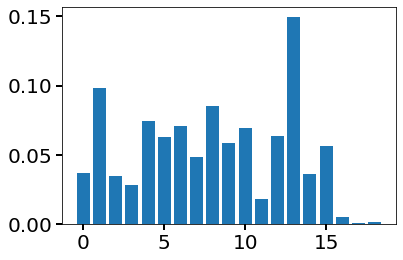

In [5]:
from sklearn.ensemble import RandomForestRegressor
df_train_prepared = df_train.drop(['RG05'], axis = 1)

forest = RandomForestRegressor()

forest.fit(df_train_prepared,df_train['RG05'])


importance = forest.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

import matplotlib.pyplot as plt 
plt.bar([x for x in range(len(importance))], importance)
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize = 20)
plt.show()




It appears the data of RG17 are essential to determine RG05. Indeed, RG17 is the gauge station closest to RG05. I calculate the Root Mean Square Error (RMSE) for all the available features. Then I remove the three features with the importance, month, year and day, and re-calculate the RMSE.

In [6]:
import numpy as np
df_test_prepared = df_test.drop(['RG05'], axis = 1)
predictions = forest.predict(df_test_prepared)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_test['RG05'].values, predictions)
rmse = np.sqrt(mse)
print('RMSE =',rmse)

RMSE = 0.6099059934589446


In [8]:
df_train_clean = df_train.drop(['Month','Day','Year'], axis=1)
df_test_clean = df_test.drop(['Month','Day','Year'], axis=1)




df_train_clean_prepared = df_train_clean.drop(['RG05'], axis = 1)

forest = RandomForestRegressor()

forest.fit(df_train_clean_prepared,df_train['RG05'])



df_test_clean_prepared = df_test_clean.drop(['RG05'], axis = 1)
predictions_clean = forest.predict(df_test_clean_prepared)
from sklearn.metrics import mean_squared_error

mse_clean = mean_squared_error(df_test_clean['RG05'].values, predictions_clean)
rmse_clean = np.sqrt(mse_clean)
print('RMSE =',rmse_clean)

RMSE = 0.5793218920180975
